In [287]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **HW1: Regression** 
In *assignment 1*, you need to finish:

1.  Basic Part: Implement the regression model to predict the number of dengue cases


> *   Step 1: Split Data
> *   Step 2: Preprocess Data
> *   Step 3: Implement Regression
> *   Step 4: Make Prediction
> *   Step 5: Train Model and Generate Result

2.  Advanced Part: Implementing a regression model to predict the number of dengue cases in a different way than the basic part

# 1. Basic Part (60%)
In the first part, you need to implement the regression to predict the number of dengue cases

Please save the prediction result in a csv file **hw1_basic.csv**


## Import Packages

> Note: You **cannot** import any other package in the basic part

In [288]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random

## Global attributes
Define the global attributes

In [289]:
input_dataroot = 'hw1_basic_input.csv' # Input file named as 'hw1_basic_input.csv'
output_dataroot = 'hw1_basic.csv' # Output file will be named as 'hw1_basic.csv'

input_datalist =  [] # Initial datalist, saved as numpy array
output_datalist =  [] # Your prediction, should be 10 * 4 matrix and saved as numpy array
             # The format of each row should be ['epiweek', 'CityA', 'CityB', 'CityC']

You can add your own global attributes here


In [290]:
input_a_temp=[] #vaild中a氣溫
input_a_die=[] #valid中a感染者
input_b_temp=[]
input_b_die=[]
input_c_temp=[]
input_c_die=[]
training=[] # 18條用於算mape
valid=[] #用於找回歸線
predict=[] #要預測的項目
parametera=[] #a的參數
parameterb=[]
parameterc=[]
# ya=[]
# yb=[]
# yc=[]
pa=[] #a的函數
pb=[]
pc=[]

training_predicted=[] 
training_a_die=[]
training_b_die=[]
training_c_die=[]
training_a_temp=[]
training_b_temp=[]
training_c_temp=[]


## Load the Input File
First, load the basic input file **hw1_basic_input.csv**

Input data would be stored in *input_datalist*

In [291]:
# Read input csv to datalist
with open(input_dataroot, newline='') as csvfile:
  input_datalist = np.array(list(csv.reader(csvfile)))
  
  #print(input_datalist[100])


## Implement the Regression Model

> Note: It is recommended to use the functions we defined, you can also define your own functions


### Step 1: Split Data
Split data in *input_datalist* into training dataset and validation dataset 



In [292]:
def SplitData():
  tmp=np.split(input_datalist,[77,95])[1] #18條test
  global training 
  global valid
  global predict
  training = tmp
  tmp=np.split(input_datalist,[77,95])[0]
  valid=tmp
  predict=np.split(input_datalist,[77,95])[2]
  




  


### Step 2: Preprocess Data
Handle the unreasonable data
> Hint: Outlier and missing data can be handled by removing the data or adding the values with the help of statistics  

In [293]:
def PreprocessData():
  for i in input_datalist[1:]:
    i=np.delete(i,0)
    if float(i[3])==0:
      continue
    if i[0]!="": #miss 不進入 input-a
     if float(i[0])<=31 and float(i[0])>=20: # too big temperatureA 不進入 input-a,too many die也不進入
      input_a_temp.append(float(i[0]))
      if float(i[3])>=30:
        if float(i[3])>=80:
          input_a_die.append(30+(float(i[3])-30)*0.1)
        else:
          input_a_die.append(30+(float(i[3])-30)*0.3)
      else:
        input_a_die.append(float(i[3]))
      
    if i[1]!="": #miss temperatureb 不進入 input-b
     if float(i[1])<=35 and float(i[1])>=10:
      input_b_temp.append(float(i[1]))
      if float(i[4])>=30: #比平均值的1.5倍還大
        if float(i[4])>=55:
          input_b_die.append(25)
        else:
          input_b_die.append(30+(float(i[4])-30)*0.4)
      else:
        input_b_die.append(float(i[4]))
    if i[2]!="": #miss temperaturec 不進入 input-c
     if float(i[2])<=35 and float(i[2])>=11:
      input_c_temp.append(float(i[2]))
      if float(i[5])<=33:
        input_c_die.append(33)
      elif float(i[5])>=70:
        input_c_die.append(70+(float(i[5])-70))
      else:
        input_c_die.append(float(i[5]))
  for i in training:
     i=np.delete(i,0)
     if i[0]=="":
       continue
     if float(i[0])<=31:
      training_a_temp.append(float(i[0]))
      training_a_die.append(float(i[3]))
     if float(i[1])<=35 and float(i[1])>=10:
      training_b_temp.append(float(i[1]))
      training_b_die.append(float(i[4]))
     if float(i[2])<=35 and float(i[2])>=11:
      training_c_temp.append(float(i[2]))
      training_c_die.append(float(i[5]))



### Step 3: Implement Regression
> Hint: You can use Matrix Inversion, or Gradient Descent to finish this part




In [294]:
def Regression():
  global parametera
  global parameterb
  global parameterc
  # global ya
  # global yb
  # global yc
  global pa
  global pb
  global pc
  global input_a_temp
  global input_b_temp
  global input_c_temp
  parametera = np.polyfit(input_a_temp, input_a_die, 3)
  print(parametera)
  input_a_temp=np.array(input_a_temp)
  pa=np.poly1d(parametera)
  # ya= parametera[0] * input_a_temp ** 3 + parametera[1] * input_a_temp ** 2 + parametera[2] * input_a_temp + parametera[3]

  parameterb = np.polyfit(input_b_temp, input_b_die, 3)
  print(parameterb)
  input_b_temp=np.array(input_b_temp)
  pb=np.poly1d(parameterb)
  # yb= parameterb[0] * input_b_temp ** 3 + parameterb[1] * input_b_temp ** 2 + parameterb[2] * input_b_temp + parameterb[3]

  parameterc = np.polyfit(input_c_temp, input_c_die, 3)
  print(parameterc)
  input_c_temp=np.array(input_c_temp)
  pc=np.poly1d(parameterc)
  # yc= parameterc[0] * input_c_temp ** 3 + parameterc[1] * input_c_temp ** 2 + parameterc[2] * input_c_temp + parameterc[3]


### Step 4: Make Prediction
Make prediction of testing dataset and store the value in *output_datalist*

In [295]:
def MakePrediction():
  global output_datalist

  tmp=[]
  for i in predict:
    adie=parametera[0] * float(i[1]) ** 3 + parametera[1] * float(i[1]) ** 2 + parametera[2] * float(i[1]) + parametera[3]
    bdie=parameterb[0] * float(i[2]) ** 3 + parameterb[1] * float(i[2]) ** 2 + parameterb[2] * float(i[2]) + parameterb[3]
    cdie=parameterc[0] * float(i[3]) ** 3 + parameterc[1] * float(i[3]) ** 2 + parameterc[2] * float(i[3]) + parameterc[3]
    tmp.append([i[0],adie,bdie,cdie])
  output_datalist=tmp
  output_datalist=np.array(output_datalist)
  
  
  

[ 3.69835047e-03 -3.23233401e-01  8.49399852e+00 -3.35598548e+01]
[-2.30236658e-02  1.56751730e+00 -3.55032622e+01  2.93958046e+02]
[-4.88072605e-03  6.01564035e-01 -2.38292241e+01  3.38638260e+02]
[41.7, 46.8, 45.0, 43.2, 39.7, 36.9, 36.4, 41.1, 44.4, 42.0, 36.0, 35.4, 35.3, 39.0, 39.6, 39.6, 34.5, 37.5, 39.3, 36.0, 34.2, 34.2, 32.4, 34.2, 34.2, 34.8, 32.7, 34.2, 35.7, 33.0, 34.8, 32.1, 35.4, 38.7, 35.7, 40.8, 33.9, 36.9, 33.3, 32.1, 36.6, 30.3, 30.3, 22.0, 30.3, 31.5, 31.2, 26.0, 33.3, 34.2, 23.0, 26.0, 27.0, 30.6, 29.0, 34.2, 32.1, 33.9, 36.3, 35.4, 38.7, 37.5, 39.3, 38.1, 33.0, 36.3, 30.9, 29.0, 32.7, 29.0, 28.0, 30.3, 30.9, 23.0, 27.0, 27.0, 22.0, 25.0, 25.0]


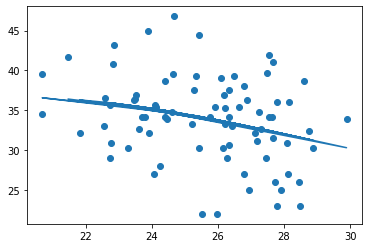

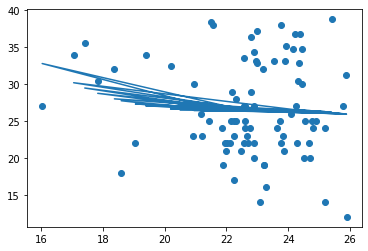

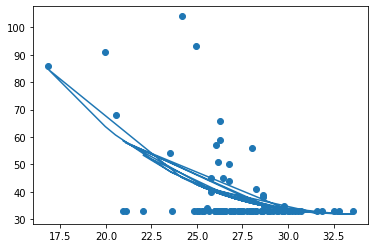

In [296]:
input_a_temp=[]
input_a_die=[]
input_b_temp=[]
input_b_die=[]
input_c_temp=[]
input_c_die=[]
input_a_changed_temp=[]
input_b_changed_temp=[]
input_c_changed_temp=[]
SplitData()
PreprocessData()
Regression()
MakePrediction()
plt.scatter(input_a_temp,input_a_die)
print(input_a_die)
plt.plot(input_a_temp,pa(input_a_temp))
plt.show()

plt.scatter(input_b_temp,input_b_die)
plt.plot(input_b_temp,pb(input_b_temp))
plt.show()

plt.scatter(input_c_temp,input_c_die)
plt.plot(input_c_temp,pc(input_c_temp))
plt.show()

### Step 5: Train Model and Generate Result

> Notice: **Remember to output the coefficients of the model here**, otherwise 5 points would be deducted
* If your regression model is *3x^2 + 2x^1 + 1*, your output would be: 
```
3 2 1
```





In [297]:
#use training to calculate mape
training_predicted_a=[]
training_predicted_b=[]
training_predicted_c=[]

training_predicted_a=pa(training_a_temp)#np.array(training_predicted_a)
training_a_die=np.array(training_a_die)
training_predicted_b=pb(training_b_temp)#np.array(training_predicted_b)
training_b_die=np.array(training_b_die)
training_predicted_c=pc(training_c_temp)
training_c_die=np.array(training_c_die)
# print(training_a_die)
# print(training_predicted_a)
# print(training_b_die)
# print(training_predicted_b)
# print(training_c_die)
# print(training_predicted_c)

MAPEA = np.mean(np.abs((training_a_die - training_predicted_a) / training_a_die))*100
MAPEB = np.mean(np.abs((training_b_die - training_predicted_b) / training_b_die))*100
MAPEC = np.mean(np.abs((training_c_die - training_predicted_c) / training_c_die))*100
print("MAPE: ",MAPEA, MAPEB, MAPEC)


# print coefficients
print("CityA coefficients:", " ".join(str(e) for e in parametera))
print("CityB coefficients:", " ".join(str(e) for e in parameterb))
print("CityC coefficients:", " ".join(str(e) for e in parameterc))

MAPE:  24.098647707122637 23.004751672480833 15.979464037728624
CityA coefficients: 0.00369835047041998 -0.32323340101496073 8.493998520310907 -33.55985475877942
CityB coefficients: -0.023023665785969955 1.5675173035425307 -35.5032621518857 293.95804601589975
CityC coefficients: -0.004880726052077095 0.6015640345002139 -23.829224082517733 338.6382602729823


## Write the Output File
Write the prediction to output csv
> Format: 'epiweek', 'CityA', 'CityB', 'CityC'

In [298]:
with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  for row in output_datalist:
    writer.writerow(row)

# 2. Advanced Part (35%)
In the second part, you need to implement the regression in a different way than the basic part to help your predictions for the number of dengue cases

We provide you with two files **hw1_advanced_input1.csv** and **hw1_advanced_input2.csv** that can help you in this part

Please save the prediction result in a csv file **hw1_advanced.csv** 


In [299]:
from sklearn.linear_model import LinearRegression
precipA=[]
precipB=[]
precipC=[]
input_advanced1=[]
input_advanced2=[]
household_without_water=[]
house_per_km2=[]
new_a_predicted=[]
predict_precip=[]
output_datalist_adv=[]
##
with open("hw1_advanced_input1.csv", newline='') as csvfile:
  input_advanced1 = np.array(list(csv.reader(csvfile)))
with open("hw1_advanced_input2.csv", newline='') as csvfile:
  input_advanced2 = np.array(list(csv.reader(csvfile)))
for i in input_advanced1[1:]:
  precipA.append(float(i[1]))
  precipB.append(float(i[2]))
  precipC.append(float(i[3]))
for i in input_advanced2[1:]:
  household_without_water.append(float(i[15]))
  house_per_km2.append(float(i[24]))

for i in input_advanced1[95:]:
  predict_precip.append(i)

tmp=[]
x=0
for i in input_datalist[1:]:
  if i[1]!="" and float(i[1])<=31 and float(i[1])>=20:
    tmp.append(precipA[x])
    x=x+1
  else:
    x=x+1
predict_a_temp=[]
for i in predict:
  predict_a_temp.append(float(i[1]))

aaa=np.append(pa(input_a_temp),pa(predict_a_temp))
new_parametera=np.polyfit(tmp, aaa, 4)
print("CityA coefficients:", " ".join(str(e) for e in new_parametera))
tmp=[]
x=0
for i in input_datalist[1:]:
  if i[2]!="" and float(i[2])<=35 and float(i[2])>=10:
    tmp.append(precipB[x])
    x=x+1
  else:
    x=x+1
predict_b_temp=[]
for i in predict:
  predict_b_temp.append(float(i[2]))

bbb=np.append(pb(input_b_temp),pb(predict_b_temp))
new_parameterb=np.polyfit(tmp, bbb, 4)
print("CityB coefficients:", " ".join(str(e) for e in new_parameterb))
tmp=[]
x=0
for i in input_datalist[1:]:
  if i[3]!="" and float(i[3])<=35 and float(i[3])>=11:
    tmp.append(precipC[x])
    x=x+1
  else:
    x=x+1
predict_c_temp=[]
for i in predict:
  predict_c_temp.append(float(i[3]))

ccc=np.append(pc(input_c_temp),pc(predict_c_temp))
new_parameterc=np.polyfit(tmp, ccc, 4)
print("CityC coefficients:", " ".join(str(e) for e in new_parameterc))

CityA coefficients: -0.0007248618454152373 0.021562622559012683 -0.21262180140646028 0.7301291148290514 33.39943693108586
CityB coefficients: -0.0012214393807876136 0.030943253516025584 -0.24277837818744122 0.6381595300518955 26.282837479451466
CityC coefficients: 0.0006685160099459192 -0.031016580118410395 0.4682839283859501 -2.3436147826491154 39.456629370580465


In [300]:
def NewMakePrediction():
  global output_datalist_adv

  tmp=[]
  for i in predict_precip:
    adie=new_parametera[0] * float(i[1]) ** 4 + new_parametera[1] * float(i[1]) ** 3 + new_parametera[2] * float(i[1])**2 + new_parametera[3]* float(i[1])+new_parametera[4]
    bdie=new_parameterb[0] * float(i[2]) ** 4 + new_parameterb[1] * float(i[2]) ** 3 + new_parameterb[2] * float(i[2])**2 + new_parameterb[3]* float(i[2])+new_parameterb[4]
    cdie=new_parameterc[0] * float(i[3]) ** 4 + new_parameterc[1] * float(i[3]) ** 3 + new_parameterc[2] * float(i[3])**2 + new_parameterc[3]* float(i[3])+new_parameterc[4]
    tmp.append([i[0],adie,bdie,cdie])
  output_datalist_adv=tmp
  output_datalist_adv=np.array(output_datalist_adv)
  

In [301]:
NewMakePrediction()
print(output_datalist_adv)

[['202143' '33.95923824383508' '26.481132617541473' '38.97888929028875']
 ['202144' '33.701163106559605' '26.493508695077743' '39.01812807149358']
 ['202145' '34.12550502447014' '26.541959096848274' '38.91950504579813']
 ['202146' '33.75797914908128' '26.594204028646555' '35.80394028468765']
 ['202147' '33.862171391566335' '26.84425143527051' '35.798429537829705']
 ['202148' '33.771191678951396' '27.007268374173375' '38.28567766968498']
 ['202149' '34.114848989930735' '26.695516648660256' '38.455386729566925']
 ['202150' '34.08470797455105' '26.80139600130045' '35.75617451417153']
 ['202151' '34.18086773454601' '26.71501600178671' '37.239572726404084']
 ['202152' '33.99380312381638' '26.39553413869261' '38.01779350914807']]


In [302]:
training_predicted_a_adv=[]
training_predicted_b_adv=[]
training_predicted_c_adv=[]
precipA_train=[]
precipB_train=[]
precipC_train=[]

paa=np.poly1d(new_parametera)
pbb=np.poly1d(new_parameterb)
pcc=np.poly1d(new_parameterc)
for i in input_advanced1[77:95]:
  if i[0]!="202131" and i[0]!= "202132":
    precipA_train.append(float(i[1]))
  if i[0]!="202131":
    precipB_train.append(float(i[2]))
  if i[0]!="202131" and i[0]!= "202130":
    precipC_train.append(float(i[3]))

training_predicted_a_adv=paa(precipA_train)#np.array(training_predicted_a)
print(len(training_predicted_a_adv))
training_predicted_b_adv=pbb(precipB_train)#np.array(training_predicted_b)

training_predicted_c_adv=pcc(precipC_train)

print(training_a_die)
print(training_predicted_a_adv)
print(training_b_die)
print(training_predicted_b_adv)
print(training_c_die)
print(training_predicted_c_adv)

MAPEA = np.mean(np.abs((training_a_die - training_predicted_a_adv) / training_a_die))*100
MAPEB = np.mean(np.abs((training_b_die - training_predicted_b_adv) / training_b_die))*100
MAPEC = np.mean(np.abs((training_c_die - training_predicted_c_adv) / training_c_die))*100
print("MAPE: ",MAPEA, MAPEB, MAPEC)


16
[57. 40. 51. 33. 29. 39. 29. 28. 31. 33. 23. 27. 27. 22. 25. 25.]
[33.86673712 34.1112314  34.03176049 33.65310981 33.84954281 33.9279114
 33.87929119 33.78030616 33.39943693 34.1928639  34.12781178 33.78030616
 34.201644   34.00935343 34.12434358 34.02202476]
[23. 23. 27. 35. 22. 19. 22. 18. 25. 27. 25. 12. 22. 22. 27. 23. 24.]
[26.79291405 26.49624686 26.5639598  26.73458604 26.67676476 26.52513784
 26.8090756  26.48575768 26.73044829 26.4722568  26.87116877 26.47210554
 26.52796919 26.65829611 26.90748936 27.2302745  26.49067493]
[68. 54. 57. 59. 45. 66. 56. 44. 40. 39. 50. 35. 33. 31. 35. 41.]
[39.45662937 45.68896566 38.15346446 38.66876485 37.53563508 38.32885579
 39.08104677 39.06055107 37.70797813 37.79492897 38.16308973 36.59690875
 39.06361862 41.44799726 38.96603011 37.72439693]
MAPE:  24.778054612079263 23.212919098089124 20.83106652704953


In [303]:
with open("hw1_advanced.csv", 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  for row in output_datalist_adv:
    writer.writerow(row)

# Report *(5%)*

Report should be submitted as a pdf file **hw1_report.pdf**

*   Briefly describe the difficulty you encountered 
*   Summarize your work and your reflections 
*   No more than one page






# Save the Code File
Please save your code and submit it as an ipynb file! (**hw1.ipynb**)